In [1]:
import seaborn as sns
import numpy as np
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [3]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
    text = re.sub('#', '', text)  # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text)  # Removing RT
    text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

    return text

def get_clean_data(dir_tp):
#     df = ppd.read_csv(dir_tp,sep="\t",encoding = "ISO-8859-1", names=["Tweet", "lable"])
    df=pd.read_csv(dir_tp,sep="\t",encoding = "utf-8", names=["Tweets", "label"])

# 
    df['Tweets'] = df['Tweets'].apply(cleanTxt)
    return df



In [ ]:
dir_tp='data/test_tweets.tsv'
df=pd.read_csv(dir_tp,sep="\t",encoding = "utf-8", names=["tweet", "lable"])

In [ ]:
df2=get_clean_data(dir_tp)
df2.head(100)

In [2]:
# df_train.to_csv(r'data\train_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)
# df_test.to_csv(r'data\test_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)

NameError: name 'df_train' is not defined

In [ ]:
df.head(100)

In [ ]:
# df_train.to_csv(r'data\train_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)
# df_test.to_csv(r'data\test_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)

2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


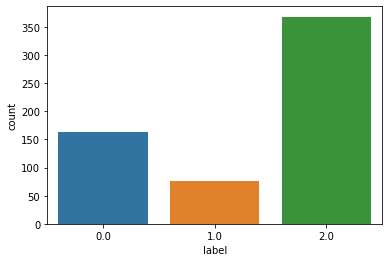

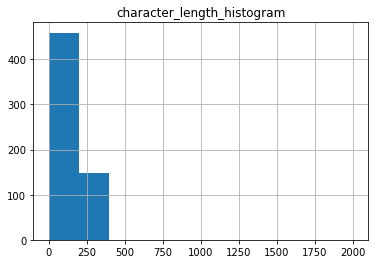

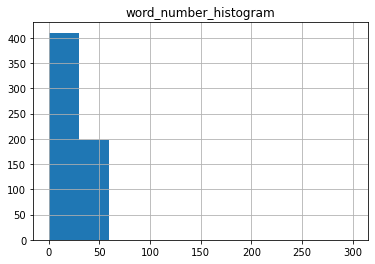

['של', 'את', 'זה', 'אני']


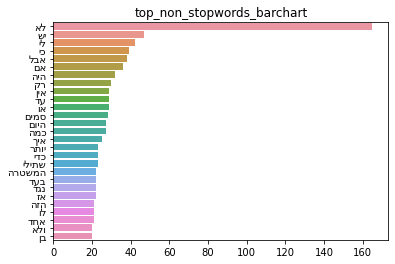

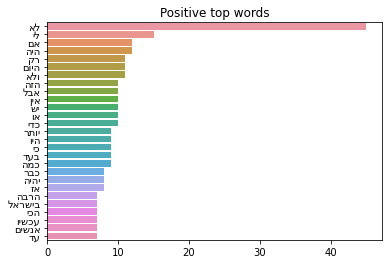

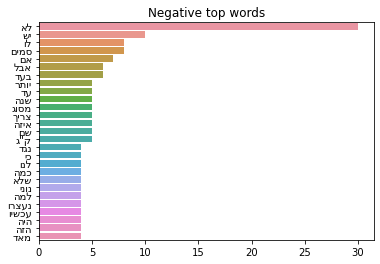

In [4]:
from train import train_all_models,data_acquisition,data_pre_processing
from morphamizer import create_morphamaized_file
from utils import get_strongest_words
from evaluate_sentiment import Evaluator


# TRAIN_PATH = 'data/train_tweets_morph.tsv'
# TEST_PATH = 'data/test_tweets_morph.tsv'

#
train_path = r'data\train_tweet_data_labeld_final.tsv'
test_path = r'data\test_tweet_data_labeld_final.tsv'
to_morph=False
print_info=True
with_stat=True
train_df, test_df = data_acquisition(train_path, test_path, to_morph, print_info, with_stat)

X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(train_df, test_df)

evaluator = Evaluator(test_path, test_df)

# trying out different classifiers

# we wont save these thay are for baseline






In [1]:
from classifiers import *
majority_classifier(test_df, evaluator, 0)
throw_a_die_classifier(test_df, evaluator)

# saving models
naive_bayes = naive_bayes_classifier(X_train_tf, train_df, X_test_tfidf, evaluator)
lrc = logistic_regression_classifier(X_train_tf, train_df, X_test_tfidf, evaluator)
rfc = random_forest_classifier(X_train_tf, train_df, X_test_tfidf, evaluator)
svm = SVM_classifier(X_train_tf, train_df, X_test_tfidf, evaluator)
dtr = DecisionTreeRegressor_classifier(X_train_tf, train_df, X_test_tfidf, evaluator)

# using ngrams



# return naive_bayes, lrc, rfc, svm, lruc12, rfc12, svm12, lruc13, rfc13, svm13, count_vect

NameError: name 'test_df' is not defined

In [ ]:
from train import ngram_text_tf_idf
ngrams = [(1, 2), (1, 3)]
X_train_tf12, X_test_tfidf12 = ngram_text_tf_idf(train_df, test_df, ngrams[0])
help = f'Using ngram_range= {ngrams[0]} '
lruc12 = logistic_regression_unibigram_classifier(X_train_tf12, train_df, X_test_tfidf12, evaluator, help=help)
rfc12 = random_forest_classifier(X_train_tf12, train_df, X_test_tfidf12, evaluator, help=help)
svm12 = SVM_classifier(X_train_tf12, train_df, X_test_tfidf12, evaluator, help=help)
dtr12 = DecisionTreeRegressor_classifier(X_train_tf12, train_df, X_test_tfidf12, evaluator, help=help)

In [ ]:
from sklearn.svm import SVC

dtr = DecisionTreeRegressor()
Mb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC(kernel='linear')
dt=DecisionTreeRegressor()
model_dict={clf.__class__.__name__:clf for clf in [dtr,Mb,lr,rf,svm,dt]}
model_dict

In [ ]:
for m in model_dict:
    print(m)

In [ ]:
dt.__class__.__name__

In [ ]:
lruc13[0].__class__.__name__

In [ ]:
X_train_tf13, X_test_tfidf13 = ngram_text_tf_idf(train_df, test_df, ngrams[1])
help = f'Using ngram_range= {ngrams[1]} '
lruc13 = logistic_regression_unibigram_classifier(X_train_tf13, train_df, X_test_tfidf13, evaluator, help=help)
rfc13 = random_forest_classifier(X_train_tf13, train_df, X_test_tfidf13, evaluator, help=help)
svm13 = SVM_classifier(X_train_tf13, train_df, X_test_tfidf13, evaluator, help=help)
dtr13 = DecisionTreeRegressor_classifier(X_train_tf13, train_df, X_test_tfidf13, evaluator, help=help)

In [ ]:
def ngram_text_tf_idf(train_df, test_df, range=(1, 2)):
    count_vect = CountVectorizer(ngram_range=range)
    X_train_counts = count_vect.fit_transform(train_df.text)

    tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
    X_train_tf = tf_transformer.transform(X_train_counts)

    X_test_counts = count_vect.transform(test_df.text)
    X_test_tfidf = tf_transformer.transform(X_test_counts)
    return X_train_tf, X_test_tfidf,count_vect
X_train_tf12, X_test_tfidf12,count_vect12=ngram_text_tf_idf(train_df, test_df, ngrams[0])
X_train_tf13, X_test_tfidf13,count_vect13=ngram_text_tf_idf(train_df, test_df, ngrams[1])

In [ ]:
# def get_strongest_words(clf,count_vect):
clf=lruc13[0]
inverse_dict={count_vect13.vocabulary_[w]:w for w in count_vect13.vocabulary_.keys()}

for lbl in range(len(clf.coef_)):
    cur_coef=clf.coef_[lbl]
    word_df = pd.DataFrame({"val": cur_coef}).reset_index().sort_values(["val"], ascending=[False])

    word_df.loc[:, "word"] = word_df["index"].apply(lambda v: inverse_dict[v])
    print(f'best words for label {lbl}')
    print(word_df.head(10))

In [ ]:
best_model=dtr13
filename = 'finalized_tweet_model.sav'


In [ ]:
import pickle

def save_model(model,filename) :

    pickle.dump(model, open(filename, 'wb'))

# some time later...
def load_model(filename) :

    return(pickle.load(open(filename, 'rb')))

def predict(modle,data):
    data=
    res=clf2.predict(X)
    return(res)

# >>> clf2 = pickle.loads(s)
# >>> clf2.predict(X[0])

In [ ]:
save_model(best_model,filename)
check=load_model(filename)


In [ ]:
clf=lruc13[0]
cur_coef=clf.coef_[lbl]
word_df = pd.DataFrame({"val": cur_coef}).reset_index().sort_values(["val"], ascending=[False])


In [ ]:
cur_coef=lruc13[0].coef_[lbl]
len(cur_coef)

In [ ]:
clf=rfc13[0]
a=clf.feature_importances_
a.sort()
a[-9:]

In [ ]:
clf=rfc13[0]
cur_coef=clf.feature_importances_[0]
inverse_dict={count_vect13.vocabulary_[w]:w for w in count_vect13.vocabulary_.keys()}
word_df = pd.DataFrame({"val": cur_coef}).reset_index().sort_values(["val"], ascending=[False])



In [ ]:
clf=rfc13[0]
inverse_dict={count_vect13.vocabulary_[w]:w for w in count_vect13.vocabulary_.keys()}

for lbl in range(len(clf.feature_importances_)):
    cur_coef=clf.feature_importances_[lbl]
    word_df = pd.DataFrame({"val": cur_coef}).reset_index().sort_values(["val"], ascending=[False])

    word_df.loc[:, "word"] = word_df["index"].apply(lambda v: inverse_dict[v])
    print(f'best words for label {lbl}')
    print(word_df.head(10))

In [ ]:
# Get numerical feature importances
importances = list(rfc13[0].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(inverse_dict, importances)]


In [ ]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
count=0
for i,j in  feature_importances:
    if j!=0.0:
        count+=1
        print((i,j))
print(count)

In [ ]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances=feature_importances
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
# Import matplotlib for plotting and use magic command for Jupyter Notebooks


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
get_strongest_words(rfc13, count_vect)


In [ ]:
def corputs(text):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
return corpus 

In [ ]:



#from nltk.corpus import stopwords


# count stopwords 
# def count_stopwords(text, stop):
#     #stop=set(stopwords.words('english'))
#     #stop=set(get_hebrew_stopwords())
    
#     new= text.str.split()
#     new=new.values.tolist()
#     corpus=[word for i in new for word in i]
def count_stopwords(coprus,stop):
    
    counter=0
    for word in corpus:
        if word in stop:
            couter+=1
        
    return counter




In [ ]:
def plot_top_non_stopwords_barchart(corpus,stop to_plot=True):

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    if to_plot:       
        sns.barplot(x=y,y=invert_words(x))
    
    return x # the 10 most comon words 

In [ ]:
# def top_ngrams_barchart(text, n=2,plt):
def top_ngrams_barchart(corpus, n=2,plt):
    #stop=set(stopwords.words('english'))

#     new= text.str.split()
#     new=new.values.tolist()
#     corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    if plt:
        sns.barplot(x=y,y=invert_words(x))
    return len 

# Topic Modelling LDA visualization

In [ ]:
import numpy as np
import nltk
#from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text, stop):
    #nltk.download('stopwords')    
    #top=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(text, stop)
lda_model.show_topics()

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

In [ ]:
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd
import codecs
import json
import pandas as pd
pd.options.mode.chained_assignment = None
from typing import List, Dict

query1="#קורונה"
query2="from:Netanyahu"
query3="(לגליזציה, OR קנאביס, OR קנביס, OR מריחואנה, OR גראס)"
query4 = "(#משפט AND #ביבי)"
q_no_retweets='-filter:retweets'
q_no_replies='-filter:replies'


In [ ]:


list_of_tweets_Korona_hash= query_tweets(query3+q_no_retweets, begindate=dt.date(2020, 1, 1), enddate=dt.date.today(),lang='he')


list_of_tweets_texts_Korona_hash = []
tmp = []




In [ ]:

df = pd.DataFrame(t.__dict__ for t in list_of_tweets_Korona_hash)

In [ ]:
df.keys()

In [ ]:
df_clean=df[df.is_reply_to==False]
df_clean.head()


In [ ]:
ind=[]
for i, tweet in df_clean.iterrows():
    if tweet.text not in list_of_tweets_texts_Korona_hash:
        list_of_tweets_texts_Korona_hash.append(tweet.text)
        ind.append(i)

ind      


In [ ]:
df_clean.shape

In [ ]:
df_clean.drop_duplicates(subset ="text",keep='first',inplace=True)
df_clean.shape

In [ ]:
# df['text'] = df['text'].str.replace('\n',' ')


In [ ]:
l=df_clean.text.tolist()
len(l)

In [ ]:
pd.DataFrame(l).to_excel(r'./tweetdata_mbcs.xlsx',index=False)

In [ ]:
# df_clean.text.to_csv("tweetdata_mbcs.csv", index=False,encoding='mbcs')


In [ ]:
p=r'data\tweet_data_labeld_final.xlsx'

In [ ]:
data=pd.read_excel(p,header=None, names=["tweet", "label"])
data.head()

In [ ]:
data['label']=data.label.replace("P","p")
data['label']=data.label.replace("N","n")

In [ ]:

posi=data[data["label"]=='P']
neg=data[data["label"]=='N']
neut=data[data["label"]=='?']

In [ ]:
posi=data[data["label"]=='p']
neg=data[data["label"]=='n']
neut=data[data["label"]=='?']

In [ ]:

len(neg),len(posi),len(neut)
#len(neut)

In [ ]:
data['label']=data.label.replace("p",0)
data['label']=data.label.replace("n",1)
data['label']=data.label.replace("?",2)

In [ ]:
from sklearn.model_selection import train_test_split


train_p, test_p = train_test_split(data[data['label']==0], test_size=0.2)
train_n, test_n = train_test_split(data[data['label']==1], test_size=0.2)
train_u, test_u = train_test_split(data[data['label']==2], test_size=0.2)




In [ ]:
train_p.head()

In [ ]:
train_n.head()

In [ ]:
df_train = pd.concat([train_p, train_n,train_u], ignore_index=True)
df_test = pd.concat([test_p, test_n,test_u], ignore_index=True)



In [ ]:
df_train.to_csv(r'data\train_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)
df_test.to_csv(r'data\test_tweet_data_labeld_final.tsv',sep = '\t',header=False,index=False)